In [1]:
import numpy as np
import matplotlib.pyplot as plt

import audacity

import FluteTransients as ftr

%matplotlib notebook

In [2]:
# Listing relevant datafiles
acquisitions = [0, 1, 2]
runnames = np.arange(300, 675, 25)
RUNS = 15
CHANNEL_CONFIG = (1, 3, 0, 2)

dfiles = []
for acq in acquisitions:
    dfiles.append([])
    for r, rn in enumerate(runnames):
        acqfiles = "DATA/MAIN_4500rpm/freqchange/cross/%d_%d.aup" % (rn, acq)
        dfiles[acq].append(acqfiles)

In [3]:
IRdata = []
for acqno, acqfiles in enumerate(dfiles):
    IRdata.append([])
    for file in acqfiles:
        filedata = ftr.get_tfdata(file, *CHANNEL_CONFIG, nfft=1024*2)
        IRdata[acqno].append(filedata['ir'])

DATA/MAIN_4500rpm/freqchange/cross/300_0.aup
DATA/MAIN_4500rpm/freqchange/cross/325_0.aup
DATA/MAIN_4500rpm/freqchange/cross/350_0.aup
DATA/MAIN_4500rpm/freqchange/cross/375_0.aup
DATA/MAIN_4500rpm/freqchange/cross/400_0.aup
DATA/MAIN_4500rpm/freqchange/cross/425_0.aup
DATA/MAIN_4500rpm/freqchange/cross/450_0.aup
DATA/MAIN_4500rpm/freqchange/cross/475_0.aup
DATA/MAIN_4500rpm/freqchange/cross/500_0.aup
DATA/MAIN_4500rpm/freqchange/cross/525_0.aup
DATA/MAIN_4500rpm/freqchange/cross/550_0.aup
DATA/MAIN_4500rpm/freqchange/cross/575_0.aup
DATA/MAIN_4500rpm/freqchange/cross/600_0.aup
DATA/MAIN_4500rpm/freqchange/cross/625_0.aup
DATA/MAIN_4500rpm/freqchange/cross/650_0.aup
DATA/MAIN_4500rpm/freqchange/cross/300_1.aup
DATA/MAIN_4500rpm/freqchange/cross/325_1.aup
DATA/MAIN_4500rpm/freqchange/cross/350_1.aup
DATA/MAIN_4500rpm/freqchange/cross/375_1.aup
DATA/MAIN_4500rpm/freqchange/cross/400_1.aup
DATA/MAIN_4500rpm/freqchange/cross/425_1.aup
DATA/MAIN_4500rpm/freqchange/cross/450_1.aup
DATA/MAIN_

In [10]:
meanIR = np.mean(IRdata, axis=0)
stdevsIR = ftr.get_stdevs(IRdata, meanIR)

rcoeff = np.polyfit(np.arange(RUNS), meanIR, 2)
rfunc = np.poly1d(rcoeff)
rcoeff

array([  4.02051531e-04,  -7.45353754e-05,   9.47983168e-02])

<IPython.core.display.Javascript object>


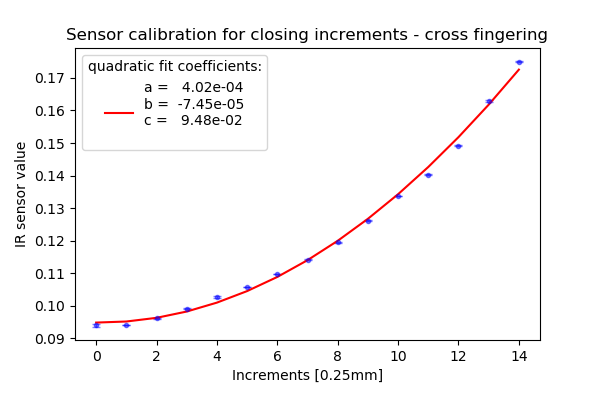

In [13]:
plt.figure(figsize=(6, 4))
plt.errorbar(np.arange(RUNS), meanIR, yerr=stdevsIR,
            ls='none', lw=1, marker='.', capsize=3, alpha=0.5, color='b', ecolor='b')
plt.plot(np.arange(RUNS), rfunc(np.arange(RUNS)), c='r',
        label="a = {:10.2e}\nb = {:10.2e}\nc = {:10.2e}\n".format(*rcoeff))
plt.title('Sensor calibration for closing increments - cross fingering')
plt.xlabel('Increments [0.25mm]')
plt.ylabel('IR sensor value')
plt.legend(loc='upper left',title="quadratic fit coefficients:")
plt.subplots_adjust(bottom=0.15)
# plt.savefig('IRcalib_cross.png')